# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 2. Поиск по образцу.**


### *Краткое описание*



### *Структура и оценивание*

Практическая работа 2 состоит из трех частей, расположенных в порядке усложнения заданий, которые необходимо реализовать в каждой части практической работы. С соответствии с этим каждая часть оценивается определенным количеством баллов (указана в скобках). Максимально допустимая оценка за работу — XX баллов.

Обратите внимание, что в каждом части практической работы есть задания, которые необходимо реализовать, и есть вопросы, на которые необходимо дать ответ. Вопросы дополняют задания и направлены на то, чтобы дать объяснение обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов будут снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы выставлены не будут.


### *Сроки выполнения*
Практическую работу можно сдаваться по частям, по мере их готовности. Каждую часть необходимо сдать не позднее следующих сроков:
- 1 Часть – XX.YY.20ZZ ;
- 2 Часть – XX.YY.20ZZ ;
- 3 Часть – XX.YY.20ZZ .

В случае, если части практической работы сдаются не в указанные сроки, то  баллы будут снижены на XX баллов.

In [ ]:
import os
os.chdir('/content/drive/MyDrive/TimeSeriesCourse/practice/01 Similarity search/solution')

In [ ]:
%load_ext autoreload
%autoreload 2

## **Часть 1 (XX баллов)** Наивный алгоритм поиска по образцу.

Импорт библиотек и модулей

In [ ]:
import numpy as np
import pandas as pd
import time

from modules.utils import *
from modules.plots import *
from modules.bestmatch import *

### **Задание 1.**

В первом задании вам предстоит самостоятельно реализовать наивный поиск top-$k$ похожих подпоcледовательностей временного ряда на заданный образец поиска.


Сначала выполните считывание временного ряда и образца поиска из файлов *ECG.csv* и *ECG_query.csv* соответственно, которые располагаются в директории *./datasets/part1*. Временной ряд представляет собой показания ЭКГ пациента, образец поиска – фрагмент ЭКГ, обозначающий кардиологическое заболевание. Необходимо по записи ЭКГ пациента определить, имеет ли он данное заболевание сердца.

In [ ]:
def load_ts(file_name):

    ts = pd.read_csv(file_name, header=None, delim_whitespace=True)

    return ts

In [ ]:
ts_url = '../datasets/part1/ECG.csv'
query_url = '../datasets/part1/ECG_query.csv'

ts = load_ts(ts_url).squeeze().to_numpy()
query = load_ts(query_url).squeeze().to_numpy()

Выполните визулизацию временного ряда и образца поиска с помощью функции `plot_bestmatch_data()` из модуля plots.py.

In [ ]:
plot_bestmatch_data(ts[16000:18000], query)

Реализуйте самостоятельно наивный поиск top-$k$ подпоследовательностей временного ряда, похожих на образец поиска в смысле DTW меры. Для этого уже подготовлен шаблон класса `NaiveBestMatchFinder` в модуле *bestmatch.py*. Напишите метод `perform()`, выполняющий обнаружение подпоследовательностей ряда, похожих на образец поиска. При этом метод должен избегать попадания в результирующее множество пересекающихся подпоследовательностей. Воспользуйтесь функцией `_top_k_match()` из базового класса `BestMatchFinder`, которая возвращает top-$k$ похожих на образец поиска непересекающихся подпоследовательностей.

При реализации опирайтесь на псевдокод наивного алгоритма поиска, который представлен ниже.

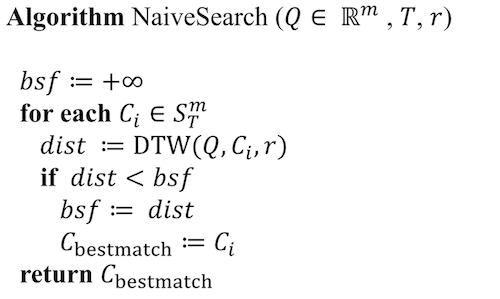

In [ ]:
top_k = 2
r = 0.01
exclusion_zone = 1
normalize = True

naive_bestmatch_model = NaiveBestMatchFinder(ts[16000:18000], query, exclusion_zone, top_k, normalize, r)
naive_bestmatch_results = naive_bestmatch_model.perform()
print(naive_bestmatch_results)

{'index': [1213, 191], 'distance': [13.926217775336447, 192.9575116412412]}


Напишите функцию `plot_bestmatch_results()` в модуле *plots.py* для визуализации найденных top-$k$ похожих подпоследовательностей временного ряда на образец поиска. За основу возьмите функцию `plot_bestmatch_data()` и добавьте отображение найденных подпоследовательностей, показанных тем же цветом, что и образец поиска.

In [ ]:
plot_bestmatch_results(ts[16000:18000], query, naive_bestmatch_results)

### **Задание 2**.
Проведите эксперименты по исследованию длины образца поиска и ширины полосы Сако—Чиба на время выполнения наивного алгоритма. Длина временного ряда должна быть зафиксирована.

Для проведения экспериментов сгенерируйте временной ряд заданной длины и множество образцов поиска различных длин на основе модели случайных блужданий (функция `random_walk()` в *utils.py*).

In [ ]:
n = 2000 # length of time series
rand_walk_ts = random_walk(n)

m_list = [16, 32, 64, 128] # lengths of query
rand_walk_queries = {}
for m in m_list:
    rand_walk_queries[str(m)] = random_walk(m)

In [ ]:
top_k = 3
r_list = np.round(np.arange(0, 0.6, 0.1), 2)
exclusion_zone = 1
normalize = True

naive_times = np.zeros((len(r_list), len(m_list)))

for i in range(len(m_list)):
    m = m_list[i]
    for j in range(len(r_list)):
        r = r_list[j]

        print(f'm = {m}, r = {r}')

        start = time.time()
        naive_bestmatch_model = NaiveBestMatchFinder(rand_walk_ts, rand_walk_queries[str(m)], exclusion_zone, top_k, normalize, r)
        naive_bestmatch_results = naive_bestmatch_model.perform()
        end = time.time()

        naive_times[j, i] = end - start

Постройте график зависимости времени выполнения наивного алгоритма от длины образца поиска временного ряда и ширины полосы Сако–Чиба.

In [ ]:
x_title = 'Subsequence length, m'
y_title = 'Runtime, s'
plot_title = 'Runtime depending on subsequence length and warping window size'
trace_titles = np.array([f'r = {r}' for r in r_list])


mplot2d(m_list, naive_times, plot_title, x_title, y_title, trace_titles)

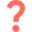
Проанализируйте и изложите содержательный смысл полученных
результатов.

*Вывод*

## **Часть 2 (XX баллов)** Алгоритм UCR-DTW.

Вторая часть практической работы посвящена алгоритму UCR-DTW, который использует нижние границы схожести ($LB_{Kim}\;FL$, $LB_{Keogh}\;\;EC$ и $LB_{Keogh}\;\;EQ$), применяющиеся каскадным образом.

<ul>
<li>
<i>Нижняя граница $LB_{Kim}\;FL$</i> представляет собой евклидово расстояние между первой и последней парами точек временных рядов $Q$ и $C$ длины $n$:

\begin{equation}
    LB_{Kim}\;FL(Q,\;C) = \text{ED}(q_1, c_1) + \text{ED}(q_n, c_n).
\end{equation}
</li>
<li>
<i>Нижняя граница $LB_{Keogh}\;\;EC$</i> показывает минимальную схожесть между оболочкой запроса $E$ (envelope) и кандидатом $C$ и вычисляется следующим образом:

\begin{equation}
    LB_{Keogh}\;\;EC = \sum_{i=1}^n{\left\{
            \begin{array}{cl}
            (c_i - u_i)^2 & \text{if} \; c_i > u_i \\
            (c_i - l_i)^2 & \text{if} \; c_i < l_i\\
            0 & \text{otherwise}.
            \end{array}
            \right.}
\end{equation}

В формуле нахождения $LB_{Keogh}\;\;EC$ последовательности $U = (u_1,..., u_n)$ и $L = (l_1,..., l_n)$ обозначают <i>верхнюю (upper)</i> и
<i>нижнюю (lower)</i> границы оболочки запроса $Q$, которые вычисляются по формуле

\begin{equation}
    u_i = \max(q􏰎_{i-r}\;,..., q_{i+r}\;), \quad l_i = \min(q_{i-r}\;,..., q_{i+r}\;).
\end{equation}

</li>
<li>
<i>Нижняя граница $LB_{Keogh}\;\;EQ$</i> представляет собой евклидово расстояние между запросом Q и оболочкой кандидата $C$, т.е. по сравнению с $LB_{Keogh}\;\;EC$ роли запроса и кандидата меняются местами:

\begin{equation}
    LB_{Keogh}\;\;EQ(Q, C) = LB_{Keogh}\;\;EC(C, Q).
\end{equation}
</li>
</ul>

### **Задание 3.**
Для реализации алгоритма UCR-DTW создан класс `UCR_DTW` в модуле *bestmatch.py*. Реализуйте нижние границы и технику каскадного применения нижних границ при вычислении DTW, заполнив пропуски в классе `UCR_DTW`. Псевдокод алгоритма `UCR_DTW` представлен ниже.

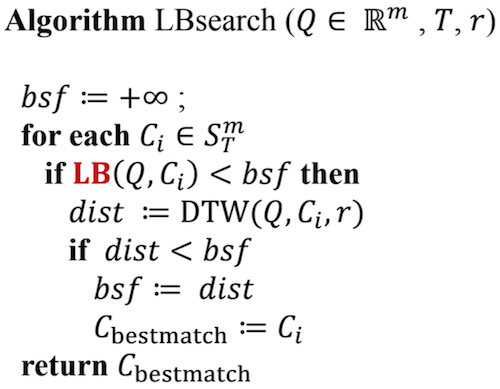

In [ ]:
top_k = 2
r = 0.01
exclusion_zone = 1
normalize = True

ucr_dtw_model = UCR_DTW(ts[16000:18000], query, exclusion_zone, top_k, normalize, r)
ucr_dtw_results = ucr_dtw_model.perform()
print(ucr_dtw_results)

{'topk_match': {'index': [1213, 191], 'distance': [13.926217775336447, 192.9575116412412]}, 'lb_Kim_num': 0, 'lb_KeoghCQ_num': 28, 'lb_KeoghQC_num': 792}


Визуализируйте количество неотброшенных и отброшенных каждой нижней границей подпоследовательностей временного ряда в виде круговой диаграммы.

In [ ]:
not_pruned_num = (len(ts[16000:18000]) - len(query) + 1) - (ucr_dtw_results['lb_Kim_num'] + ucr_dtw_results['lb_KeoghCQ_num'] + ucr_dtw_results['lb_KeoghQC_num'])

statistics = [not_pruned_num, ucr_dtw_results['lb_Kim_num'], ucr_dtw_results['lb_KeoghCQ_num'], ucr_dtw_results['lb_KeoghQC_num']]
labels = ['Not pruned', 'LB_Kim', 'LB_KeoghCQ', 'LB_KeoghQC']

plot_title = 'Statistics of pruned and not pruned subsequences'

pie_chart(labels, statistics, plot_title)

### **Задание 4.**

Проведите эксперименты по исследованию длины образца поиска и ширины полосы Сако—Чиба на быстродействие алгоритма UCR-DTW. Сравните время выполнения алгоритма UCR-DTW с наивным алгоритмом.

Для проведения экспериментов используйте временной ряд и множество образцов поиска из задания 2.

In [ ]:
ucr_dtw_times = np.zeros((len(r_list), len(m_list)))

for i in range(len(m_list)):
    m = m_list[i]
    for j in range(len(r_list)):
        r = r_list[j]

        print(f'm = {m}, r = {r}')

        start = time.time()
        ucr_dtw_bestmatch_model = UCR_DTW(rand_walk_ts, rand_walk_queries[str(m)], exclusion_zone, top_k, normalize, r)
        ucr_dtw_bestmatch_results = ucr_dtw_bestmatch_model.perform()
        end = time.time()

        ucr_dtw_times[j, i] = end - start

Постройте график зависимости времени выполнения алгоритма UCR-DTW от длины образца поиска и ширины полосы Сако–Чиба.

In [ ]:
x_title = 'Subsequence length, m'
y_title = 'Runtime, s'
plot_title = 'UCR-DTW Runtime depending on subsequence length <br> and warping window size'
trace_titles = np.array([f'r = {r}' for r in r_list])


mplot2d(m_list, ucr_dtw_times, plot_title, x_title, y_title, trace_titles)

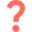
Проанализируйте и изложите содержательный смысл полученных
результатов. Сравните время выполнения наивного поиска и алгорима UCR-DTW для различных длин образца и ширины полосы Сако–Чиба.

*Вывод*

## **Часть 3 (XX баллов)** Классификация временных рядов на основе алгоритма UCR-DTW.

### **Задание 5.**
Добавьте в класс `TimeSeriesKNN` из первой практической работы поддержку поиска $k$ ближайших соседей с помощью алгоритма UCR-DTW для случая, когда классификация выполняется на основе DTW меры.

Возьмите набор данных CBF из первой практической работы и классифицируйте временные ряды для различных значений ширины полосы Сако–Чиба $r$.

In [ ]:
from modules.classification import *

In [ ]:
train_url = '../datasets/part3/CBF_TRAIN.txt'
test_url = '../datasets/part3/CBF_TEST.txt'

train_data = load_ts(train_url)
test_data = load_ts(test_url)

train_set, train_labels = train_data.iloc[:, 1:], train_data.iloc[:, 0].astype('int32')
test_set, test_labels = test_data.iloc[:, 1:], test_data.iloc[:, 0].astype('int32')

In [ ]:
accuracy_list = []
times = []

r_list = np.arange(0, 0.9, 0.05)

n_neighbors = 5
metric = 'dtw'

for r in r_list:

    metric_params = {'normalize': True, 'r': r, 'use_lb': True}

    KNN_classifier = TimeSeriesKNN(n_neighbors, metric, metric_params)
    KNN_classifier.fit(train_set, train_labels)

    start = time.time()
    y_pred = KNN_classifier.predict(test_set.iloc[0:10])
    end = time.time()

    accuracy = calculate_accuracy(test_labels.iloc[0:10], y_pred)
    accuracy_list.append(accuracy)
    times.append(end - start)

Постройте график зависимости точности классификации временных рядов от ширины полосы Сако—Чиба.

In [ ]:
x_title = 'Warping Window Size, r'
y_title = 'Accuracy'
plot_title = 'Classification accuracy depending on <br> the warping window size'

plot2d(r_list, accuracy_list, plot_title, x_title, y_title)

Постройте график зависимости времени выполнения алгоритма kNN от ширины полосы Сако—Чиба.

In [ ]:
x_title = 'Warping Window Size, r'
y_title = 'Runtime, s'
plot_title = 'Runtime depending on the warping window size'

plot2d(r_list, times, plot_title, x_title, y_title)

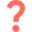
Проанализируйте графики и сделайте выводы. Изменилась ли точность классификации и время выполнения алгоритма по сравнению с результатами классификации, полученных в первой практической работе?

*Вывод*